### Objetivo:
Proporcionar información relevante sobre el comportamiento del mercado, identificar oportunidades de inversión y recomendar en qué compañías invertir y qué días de la semana son recomendables hacerlo.

Aqui se realizara el EDA, se dividirá en varias secciones, cada una enfocada en un aspecto diferente del mercado bursátil, utilizaré datos históricos de los precios de cierre diarios de las acciones del SP500 desde el año 2000 hasta la actualidad. Estos datos obtenidos de la fuente, Yahoo Finance.

In [2]:
#instalo libreria de yahoo finance
!pip install yfinance

     ---------------------------------------- 59.2/59.2 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     -------------------------------------- 129.4/129.4 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 6.2 MB/s eta 0:00:00
     -------------------------------------- 179.1/179.1 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 118.7/118.7 kB 3.5 MB/s eta 0:00:00


In [3]:
#Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
import datetime as dt

In [4]:
# Rango de fechas
ini = "2000-01-01"
act = "2023-02-23"

# Descargar los datos utilizando yfinance
data = yf.download("SPY", start=ini, end=act)


[*********************100%***********************]  1 of 1 completed


In [5]:
# Imprimir las primeras filas
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375,95.308830,8164300
2000-01-04,143.53125,144.06250,139.640625,139.7500,91.581673,8089800
2000-01-05,139.93750,141.53125,137.250000,140.0000,91.745483,12177900
2000-01-06,139.62500,141.50000,137.750000,137.7500,90.271011,6227200
2000-01-07,140.31250,145.75000,140.062500,145.7500,95.513634,8066500


In [6]:
# Actualmente "Date" se encuentra en el índice del DF, asi que lo primero que haré es convertirlo en una columa más
data = data.reset_index()

In [7]:
# Guardo datos para utilizarlos en la presentacion
#data.to_excel("PS500.xlsx", index=False)

In [8]:
# Información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5822 non-null   datetime64[ns]
 1   Open       5822 non-null   float64       
 2   High       5822 non-null   float64       
 3   Low        5822 non-null   float64       
 4   Close      5822 non-null   float64       
 5   Adj Close  5822 non-null   float64       
 6   Volume     5822 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 318.5 KB


- Podemos observar que el DataFrame contiene 7 columnas con 5822 filas. La columna "Date" es de tipo datetime64, 
mientras que las demás columnas son de tipo numérico. 

- Todas las columnas contienen 5822 valores no nulos, lo que significa que no hay valores faltantes en los datos. 

- También nos muestra la cantidad de memoria utilizada por el DataFrame, que en este caso es de aproximadamente 318.4 KB.

Análisis exploratorio de los datos, donde se calcularán estadísticas descriptivas y se visualizarán las distribuciones de las variables numéricas.

In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5.822000e+03
mean,188.646550,189.792957,187.390942,188.654537,162.117062,1.090850e+08
std,97.289667,97.811250,96.715999,97.310305,105.342114,9.365199e+07
min,67.949997,70.000000,67.099998,68.110001,51.957153,1.436600e+06
25%,118.654999,119.375002,117.882502,118.599998,85.722466,5.036362e+07
50%,143.755005,144.520004,142.724998,143.695000,108.419113,8.151715e+07
75%,238.899994,239.675007,237.899994,238.904999,216.119965,1.416840e+08
max,479.220001,479.980011,476.059998,477.709991,470.083679,8.710263e+08


count: número de valores no nulos en la columna

mean: media aritmética de los valores en la columna

std: desviación estándar de los valores en la columna

min: valor mínimo de los valores en la columna

25%: primer cuartil de los valores en la columna

50%: segundo cuartil o mediana de los valores en la columna

75%: tercer cuartil de los valores en la columna

max: valor máximo de los valores en la columna

- Se puede observar que hay 5822 días en los que se han registrado los precios de la acción del SPY, desde el año 2000 hasta la fecha actual. 
- La media y la desviación estándar de los precios de apertura, máximos, mínimos y cierre están alrededor de los 188 dólares, 
- mientras que la media y la desviación estándar del precio ajustado son alrededor de los 162 dólares. 
- El volumen de operaciones tiene una media de 109 millones de acciones, con una desviación estándar de 93 millones de acciones. 
- Los valores mínimo y máximo de cada columna representan los precios más bajos y más altos registrados durante el período de tiempo considerado.

Observar la distribución de los datos

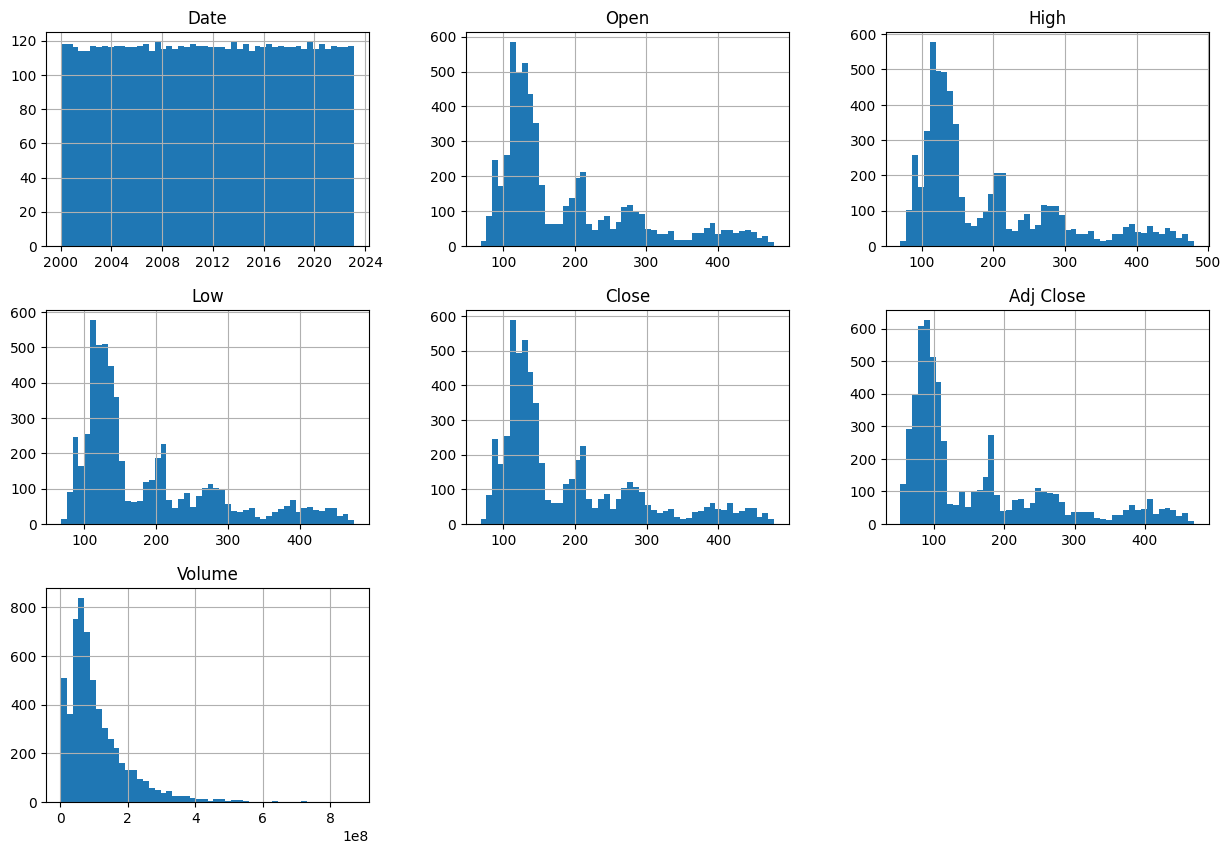

In [10]:
data.hist(figsize=(15,10), bins=50)
plt.show()

- Podemos observar que los precios de apertura, máximo, mínimo y cierre tienen una distribución similar, mientras que el volumen de acciones negociadas tiene una distribución asimétrica hacia la derecha, lo que indica una alta variabilidad en la cantidad de acciones negociadas en un solo día.

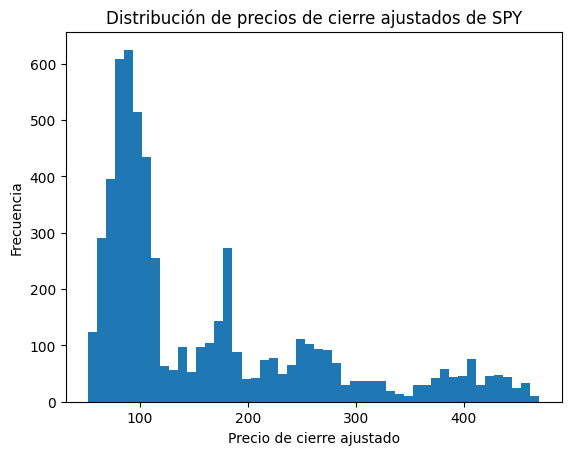

In [11]:
# Visualizar la distribución de los precios de cierre ajustados de las acciones de SPY
plt.hist(data['Adj Close'], bins=50)
plt.xlabel('Precio de cierre ajustado')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de cierre ajustados de SPY')
plt.show()

- La mayoría de los precios de cierre ajustados se encuentran en el rango de 100 a 400 dólares, lo que indica que la mayoría de las empresas del índice SP500 tienen precios de acciones dentro de este rango.

- También se puede observar que hay algunos valores atípicos (outliers) en el extremo superior del rango de precios, lo que indica que hay algunas empresas con precios de acciones significativamente más altos que la mayoría.

Se examinará la evolución de los precios a lo largo del tiempo y se identificarán patrones y tendencias.

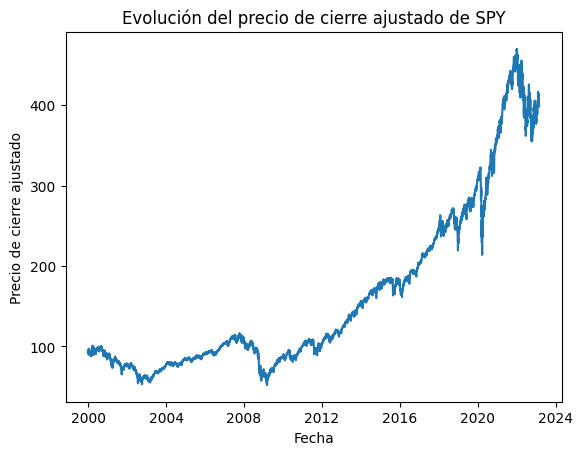

In [12]:
# Gráfica de línea que muestre la variación del precio de cierre ajustado a lo largo de los años
data = data.set_index('Date')
plt.plot(data['Adj Close']) #, linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre ajustado')
plt.title('Evolución del precio de cierre ajustado de SPY')
plt.show()

La gráfica muestra la evolución de los precios de cierre ajustados de SPY desde el año 2000 hasta la actualidad cada 4 años. 

- Se puede observar que hubo una tendencia alcista durante la década de 2000, seguida de una fuerte caída durante la crisis financiera de 2008(se desató de manera directa debido al colapso de la burbuja inmobiliaria en los Estados Unidos en el año 2006, que provocó aproximadamente en octubre de 2007 la llamada crisis de las hipotecas subprime. Las repercusiones de la crisis hipotecaria comenzaron a manifestarse de manera extremadamente grave desde inicios de 2008, contagiándose primero al sistema financiero estadounidense, y después al internacional, teniendo como consecuencia una profunda crisis de liquidez, y causando, indirectamente, otros fenómenos económicos, entre ellos, crisis bursátil mundial de octubre de 2008)

- Posteriormente, se observa una recuperación gradual de los precios, con una tendencia alcista más pronunciada a partir de 2013. 

- También se pueden observar periodos de mayor volatilidad en los precios, como en 2020 debido a la pandemia de COVID-19. 

- En general, la gráfica permite identificar patrones y tendencias en la evolución de los precios de las acciones de SPY a lo largo del tiempo.

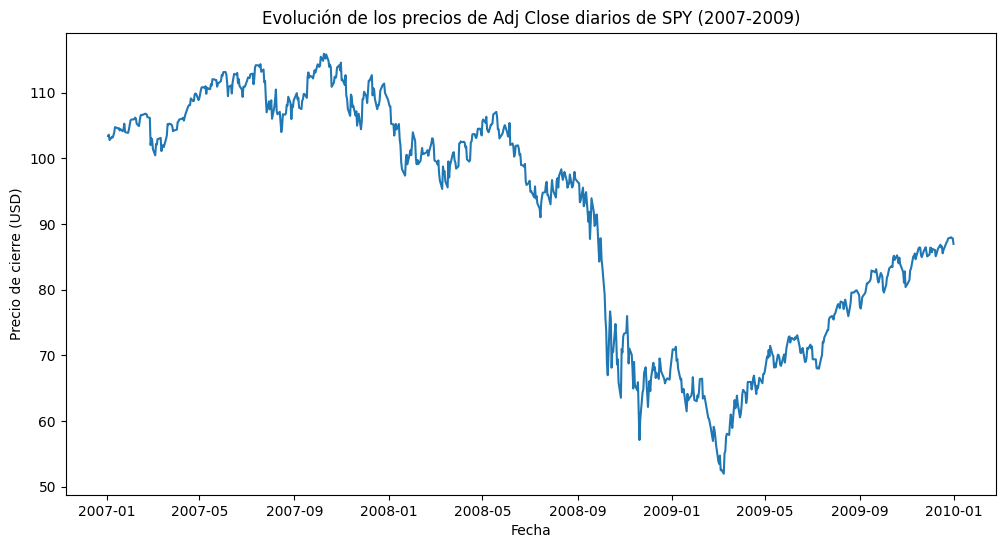

In [13]:
# Grafico de la caída brusca en 2008
# Seleccionar datos para periodo de 2007 a 2009
data_2007_2009 = data.loc['2007-01-01':'2009-12-31']

# Graficar precios de cierre diarios
plt.figure(figsize=(12,6))
plt.plot(data_2007_2009['Adj Close'])
plt.title('Evolución de los precios de Adj Close diarios de SPY (2007-2009)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.show()

- Se puede visualizar la caída brusca en 2008 y cómo los precios se recuperaron en 2009.

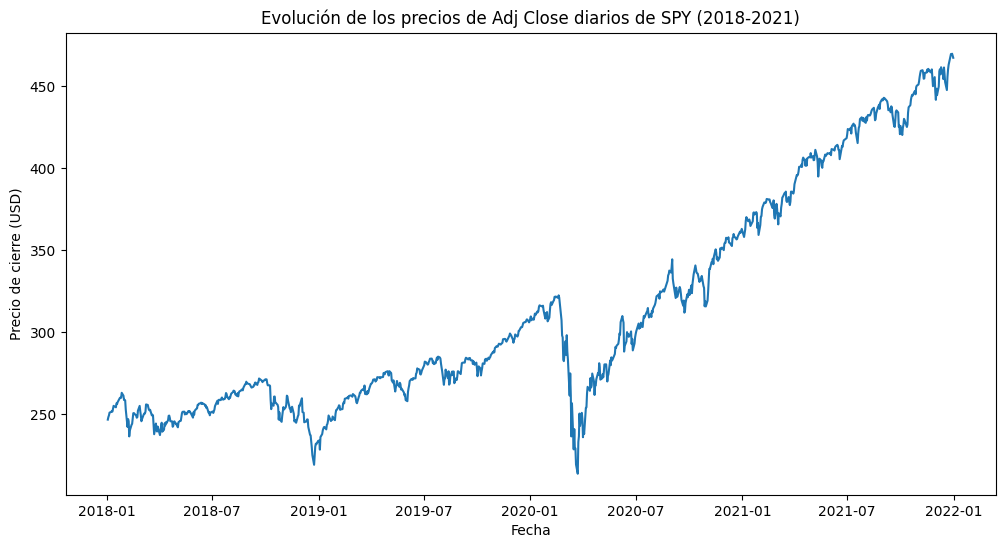

In [14]:
# Grafico de la volatilidad causada pos la pandemia
# Seleccionar datos para periodo de 2018 a 2021
data_2018_2021 = data.loc['2018-01-01':'2021-12-31']

# Graficar precios de cierre diarios
plt.figure(figsize=(12,6))
plt.plot(data_2018_2021['Adj Close'])
plt.title('Evolución de los precios de Adj Close diarios de SPY (2018-2021)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.show()

- Se analizará la volatilidad del mercado y se estudiará la correlación entre los diferentes campos del SP500.

- Para analizar la volatilidad del mercado, calcular la desviación estándar de los precios de cierre ajustados para cada día. Cuanto mayor sea la desviación estándar, mayor será la volatilidad del mercado.

In [15]:
# calcular los rendimientos diarios
returns = data['Adj Close'].pct_change()
returns

Date
2000-01-03         NaN
2000-01-04   -0.039106
2000-01-05    0.001789
2000-01-06   -0.016071
2000-01-07    0.058076
                ...   
2023-02-15    0.003247
2023-02-16   -0.013769
2023-02-17   -0.002498
2023-02-21   -0.020061
2023-02-22   -0.001378
Name: Adj Close, Length: 5822, dtype: float64

In [16]:
# calcular la desviación estándar de los rendimientos diarios
volatility = np.std(returns)
volatility

0.012496712722881923

- El resultado indica que la volatilidad diaria de SPY desde el 1 de enero de 2000 hasta el 23 de febrero de 2023 fue del 1,25%.

In [17]:
# calcular la matriz de correlación
corr_matrix = data.corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999911,0.999885,0.999805,0.997707,-0.170910
High,0.999911,1.000000,0.999808,0.999876,0.997886,-0.167653
Low,0.999885,0.999808,1.000000,0.999889,0.997683,-0.175571
Close,0.999805,0.999876,0.999889,1.000000,0.997900,-0.172017
Adj Close,0.997707,0.997886,0.997683,0.997900,1.000000,-0.139154
Volume,-0.170910,-0.167653,-0.175571,-0.172017,-0.139154,1.000000


- La correlación mide la relación entre los rendimientos de dos o más activos financieros.

<Axes: >

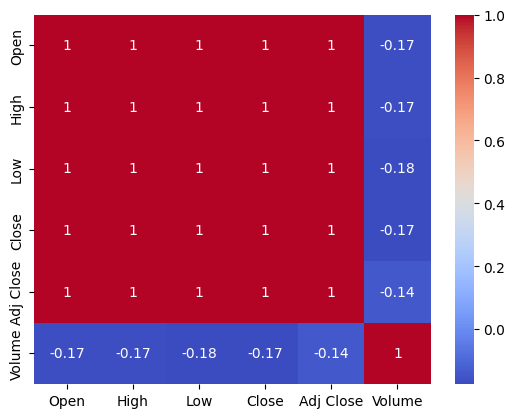

In [18]:
# Analizar la correlación entre las diferentes acciones del SP500
correlation_matrix = data.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

- Los valores más oscuros (más cercanos al azul) indican una correlación negativa, mientras que los valores más claros (más cercanos al rojo) indican una correlación positiva. Podemos ver que hay una fuerte correlación positiva entre la mayoría de las acciones del SP500, lo que sugiere que se mueven en la misma dirección en general.

- Esto puede indicar que la economía está fuerte y que la mayoría de las empresas están experimentando crecimiento y rentabilidad similares.

## Conclusión
 1) La tendencia general del mercado ha sido alcista en el largo plazo, aunque con períodos de volatilidad significativa y correcciones importantes.

 2) La correlación del índice SP500 es bastante alta, lo que sugiere que la diversificación es importante para minimizar el riesgo en una cartera de inversión.

 3)A largo plazo, la inversión en el mercado bursátil ha sido una estrategia rentable para los inversores que tienen una perspectiva de inversión a largo plazo y están dispuestos a asumir cierto riesgo.